In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from IPython.display import Image
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.keep100', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.ct0', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  #print('text_ids', text_ids)
    
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'rnn/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference('textsim', 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0], len(score[0]))
    return score[0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]
  #argmax_encode = [max(x, 0) for x in argmax_encode]

  #print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  #print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  #print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-358.4-457000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-358.4-457000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-358.4-457000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.5neg/model.ckpt-358.4-457000


In [6]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [7]:
top_words('高铁')

铁:0.922135 案:0.459531 遁形:0.458078 安装:0.451532 钢轨:0.447937 莆田:0.445349 三泰:0.437743 诚鑫:0.433522 集:0.432461 拍摄:0.429369 栅:0.428783 大方:0.424862 土方:0.423403 着眼:0.421764 抑:0.420532 变形:0.419806 长阳:0.418251 托运:0.417321 94:0.415939 胆子:0.412188 新郑:0.412112 恶霸:0.411309 母猪:0.411005 真人:0.409868 全无:0.409541 高楼:0.409232 爬坡:0.406756 铁路:0.406608 哎:0.406248 报关:0.405592 开锅:0.405589 养猪:0.405436 耗:0.405419 兵种:0.403558 人海:0.403181 广达:0.403040 猪苗:0.402863 成服:0.402003 猪崽:0.399660 河间:0.399451 贸:0.399057 大雨:0.398976 鹿茸:0.398744 南站:0.398193 一两百:0.398000 入门:0.397266 恒丰:0.397184 重质:0.397064 解难:0.396292 谈:0.395682 mpacc:0.394514 扫雪:0.394065 爱克顿:0.393582 腐朽:0.392918 敷:0.392888 整齐:0.392403 看淡:0.392072 国内:0.392051 可调:0.391939 合婚:0.391604 疏忽:0.391218 圣兽:0.390616 垂询:0.390157 凝剂:0.389694 给出:0.389476 颉:0.389381 儿子:0.389156 海涛:0.389112 吾:0.388644 微波:0.388581 互:0.388369 略:0.388357 交易:0.387995 拉带:0.387923 毛肚:0.387774 包分配:0.386955 圩:0.386739 151:0.385762 宇宙:0.385732 足下:0.385439 播种:0.384701 薯条:0.384688 瑞特:0.384082 护坡:0.383993 

In [8]:
top_words('墨镜')

墨镜:1.000000 重演:0.741703 f1:0.676597 得胜:0.671006 色调:0.649852 芦:0.643094 镜框:0.631087 孜:0.613087 偏光:0.606477 祥宝:0.600253 斑点:0.598813 体贴:0.595055 壮阔:0.590062 出名:0.583925 甜点:0.583736 件一:0.581327 眼镜:0.579297 忻:0.579164 博信:0.578814 印章:0.577643 镜架:0.575366 莲藕:0.574881 警报:0.574588 威视:0.574370 拉带:0.570926 波澜:0.570765 达康:0.570131 棒球:0.568119 泻:0.566219 台球:0.564373 悉:0.562395 兆信:0.561043 雀斑:0.558872 酒泉:0.558289 含糊:0.558063 整容:0.557075 春申:0.555096 三多:0.554513 肥壮:0.553901 肥肉:0.552783 津丰:0.552332 pert:0.552298 圣兽:0.551584 紧凑:0.550894 组成:0.549189 薛:0.548638 冰种:0.548297 1189:0.548175 荷吉:0.548126 模糊:0.547725 调理:0.547333 介意:0.546013 因纳:0.544879 鼻腔:0.543974 笔挺:0.543076 一两百:0.542520 卓高:0.542475 斯通:0.541055 神品:0.540352 依视路:0.539746 家乡:0.539649 原配:0.539065 黄昏:0.538000 肌肉:0.537919 31800:0.537539 酸洗:0.537387 蓝花:0.537011 紫菜:0.536488 舰队:0.534529 水垢:0.533805 玉山:0.533635 rp:0.533330 松石:0.533024 清晨:0.532507 酰胺:0.530116 挨宰:0.528867 碳化:0.527727 吸附:0.527685 五龙:0.526845 鼻毛:0.526151 真累:0.525529 杰龙:0.525102 多肽:0.524884 女

In [9]:
predict('墨镜', '墨镜')

[ 1.] 1


array([ 1.], dtype=float32)

In [10]:
predict('墨镜', '鼻子')

[ 0.24492137] 1


array([ 0.24492137], dtype=float32)

In [11]:
top_words('美女')

美女:1.000000 妹子:0.474651 色斑:0.443611 成功:0.408487 痘痘:0.406565 找出:0.406307 华联:0.403764 主播:0.399597 她们:0.398077 女:0.397602 扩展:0.397582 隐私:0.396723 情:0.394804 美白:0.392574 瘫:0.390804 聚拢:0.389926 征婚:0.384063 女神:0.382461 模范:0.381886 恶搞:0.380782 化妆:0.379774 裳:0.375505 痤疮:0.370627 论坛:0.370425 妹:0.369345 吊带:0.368598 菲菲:0.366888 学医:0.366327 风韵:0.365967 调查:0.364135 鲨鱼:0.363228 上镜:0.360912 脖:0.360737 图兰朵:0.360708 美丽:0.359405 睛彩:0.358613 她:0.357041 萝:0.356520 聊:0.356023 褐斑:0.355214 口中:0.353883 妆:0.353437 脸部:0.353313 仅:0.352953 眼见:0.349988 灵验:0.349752 特色:0.349571 婚恋:0.347641 领:0.347007 同学:0.346935 补气:0.346756 上司:0.345229 绝活:0.344211 傻笑:0.342932 艺:0.342782 气息:0.342106 嫣:0.341890 异域:0.340264 出轨:0.339869 明星:0.339650 清纯:0.338597 欢腾:0.336987 眉:0.336924 今晚:0.336847 黑卡:0.335282 恢弘:0.334739 彩妆:0.333439 仙剑:0.333334 歉:0.333198 单向:0.332223 闺蜜:0.331590 九级:0.331054 k歌:0.328582 看茶:0.328565 染发:0.328473 舰队:0.327980 尼奥:0.327634 曲线:0.327261 早起:0.327221 年度:0.327197 全盛:0.326319 波澜:0.325939 再临:0.325520 2016:0.325074 告知:0.

iPhone隐藏功能：高铁也能在线选座了！


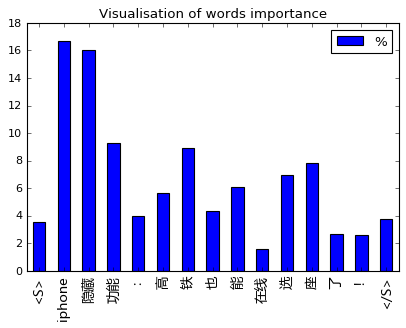

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [13]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.52980512] 1


array([ 0.52980512], dtype=float32)

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.32207507] 1


array([ 0.32207507], dtype=float32)

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.37552559] 1


array([ 0.37552559], dtype=float32)

往返飞旧金山?真是赚了,我一直在这里买!


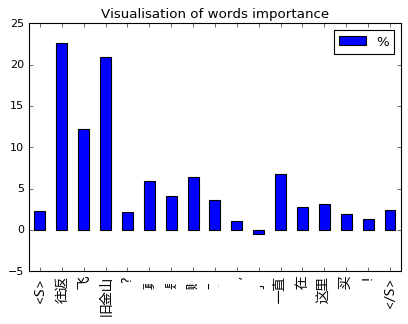

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

我的家乡惠州越来越热，选一款喜欢的墨镜很重要


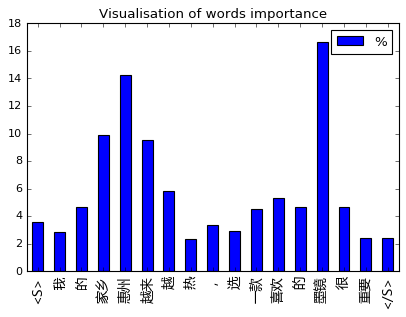

In [17]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

In [18]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '我的家乡惠州越来越热')

[ 0.60439646] 1


array([ 0.60439646], dtype=float32)

In [19]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.65495163] 1


array([ 0.65495163], dtype=float32)

In [20]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.60189635] 1


array([ 0.60189635], dtype=float32)

In [21]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.75952947] 1


array([ 0.75952947], dtype=float32)

我的家乡越来越热，选一款喜欢的墨镜很重要


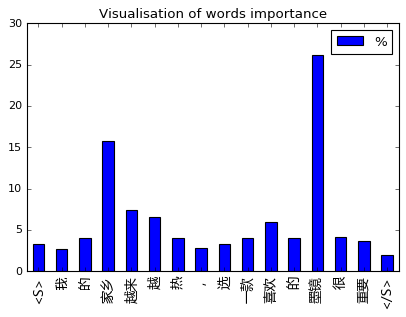

In [22]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

选一款喜欢的墨镜很重要，我的家乡越来越热


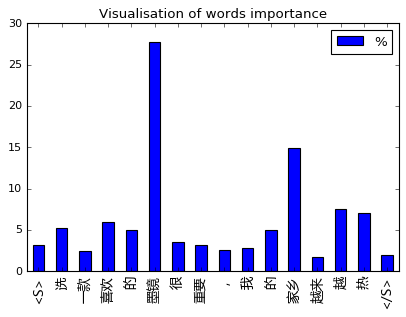

In [23]:
predict('选一款喜欢的墨镜很重要，我的家乡越来越热')

选一款喜欢的墨镜很重要


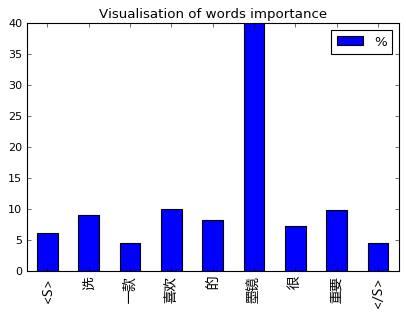

In [24]:
predict('选一款喜欢的墨镜很重要')

不要住酒店，这里的民宿好


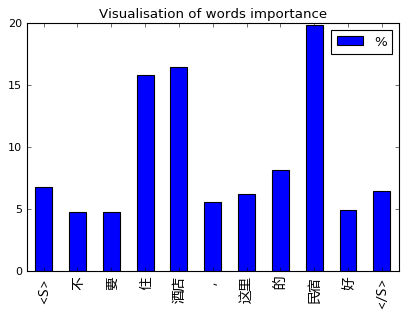

不要住民宿，这里的酒店好


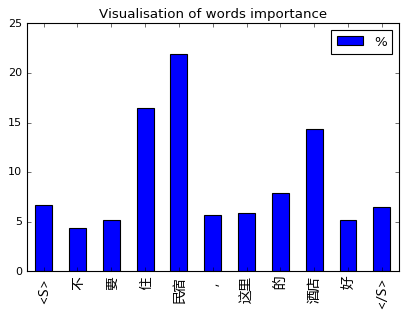

In [25]:
predict('不要住酒店，这里的民宿好')
predict('不要住民宿，这里的酒店好')

In [26]:
top_words('酒店')

酒店:1.000000 红外:0.511618 凡特:0.485114 永和:0.478952 roy:0.477654 订房:0.463797 徽派:0.460105 判别:0.457887 1100:0.455001 拎包:0.454189 城内:0.448103 弧形:0.447083 云霞:0.444429 罗帝:0.443851 蝶妆:0.443124 约客:0.442971 海选:0.442256 戴思乐:0.440861 altea:0.439071 包围:0.438196 旅店:0.435069 美尼:0.430979 收买:0.430105 吃好:0.429895 电建:0.427065 凯悦:0.426137 去:0.426013 享:0.424760 歌厅:0.424086 墙板:0.424055 西子:0.422383 喷墨:0.422123 住:0.419992 米高梅:0.419411 万全:0.419379 榆:0.418234 房:0.416466 烀:0.415550 经得起:0.414671 一世:0.414542 品台:0.413909 穆:0.413016 霰雪鸟:0.412818 滦州:0.412696 266:0.412543 小青:0.412131 携程:0.410476 奔:0.409417 宝来:0.408805 壁布:0.408073 谋划:0.407848 横流:0.407818 吃吃:0.407466 天亿:0.407401 贿:0.407012 脚下:0.406991 智源:0.406955 自力:0.406768 功底:0.406730 广大:0.406091 白虎:0.405855 嘉安:0.405009 酪:0.404386 家鸭:0.403042 4980:0.402912 种草:0.402165 复检:0.401808 延安:0.401331 麦琪:0.401295 妄为:0.401252 地表:0.401178 汾:0.399876 宏泰:0.399506 隔震:0.399465 大班:0.398953 润:0.398672 卡龙:0.397838 佰:0.397717 家居:0.397430 安丘:0.397120 行贿:0.396366 软包:0.395040 筑造:0.395003 天花板:

In [27]:
top_words('新加坡')

新加坡:1.000000 电厂:0.502887 除虫:0.490384 做大:0.488785 渔具:0.482251 过山:0.478710 吉通:0.478463 缺失:0.470058 创汇:0.469768 薏:0.461975 江华:0.461530 热力:0.459147 多分:0.457986 午夜:0.453559 诺菲德:0.452934 相约:0.452322 百利来:0.446785 泰康:0.444411 秃顶:0.443813 出水:0.439778 107:0.436201 面具:0.432705 结晶:0.431596 客人:0.431511 窑:0.430245 大梁:0.428076 马来西亚:0.427222 博信:0.426524 河道:0.426477 同心:0.426189 静音:0.424673 舆情:0.424422 旗云:0.424245 872:0.423461 宝林:0.421620 美化:0.421508 蹦:0.420605 海亚:0.420237 纯玩:0.418711 淦:0.416939 异常:0.416710 亚太:0.416340 矿物:0.412770 大亚:0.412665 移居:0.411814 面朝:0.411664 维持:0.411066 攀枝花:0.410844 何以:0.410590 雷电:0.409308 卓越:0.408970 画室:0.408805 全息:0.408470 二十二:0.407823 极光:0.407278 峨眉:0.406535 立森:0.406495 初七:0.406220 niit:0.405670 卡赛诺:0.405552 关乎:0.405504 匈牙利:0.405016 光影:0.404044 小鸭:0.403508 开勒:0.402936 t:0.402765 24h:0.402558 电量:0.401482 赖:0.401397 谷歌:0.400571 授予:0.399392 剖析:0.398061 堤:0.397604 遭受:0.397200 车程:0.397110 探照灯:0.395851 迎宾:0.395759 阁楼:0.395159 中汽:0.394966 嘉峪:0.394850 战略:0.394504 6660:0.394314 珠子:0.3

In [28]:
top_words('民宿')

民宿:1.000000 玻化:0.547490 免交:0.545548 远洋:0.540798 美妙:0.540739 东芝:0.528907 套房:0.526619 香河:0.510905 逐:0.510797 艳遇:0.510502 果岭:0.510089 学力:0.504092 奥兰多:0.503453 留白:0.501700 贰:0.500353 佛罗里达:0.496232 毕竟:0.493092 新海:0.490030 避暑:0.489971 洁源:0.488395 天亿:0.486989 阿香:0.484733 醒:0.481526 转弯:0.480988 赏:0.480105 西昌:0.479806 回春:0.478370 独自:0.475919 隔层:0.474142 石板:0.473530 波罗:0.470599 正统:0.469676 利益:0.468795 清水湾:0.468772 摒弃:0.467839 雪依氏:0.467730 汇思:0.465851 途:0.465200 远安:0.465156 活到:0.465057 绝佳:0.464350 永和:0.464080 垦:0.461973 绿化:0.461726 起价:0.458872 燊:0.457085 直减:0.457054 想来:0.456836 城内:0.456696 这份:0.456469 家道:0.455500 选房:0.455099 锝:0.454805 导游:0.454642 擎:0.454552 印尼:0.453494 密室:0.453085 淀:0.450992 一匹:0.450618 义务:0.450449 施教:0.449603 筑造:0.448845 精装:0.446761 蚊虫:0.446032 牌局:0.445466 康体:0.444408 包围:0.443835 丹东:0.443822 塘沽:0.443735 家俱:0.443487 酿制:0.443376 留给:0.441902 情节:0.441059 跟随:0.440961 缔:0.440403 骗局:0.440365 粮库:0.440306 同庆:0.440062 佳音:0.440037 学时:0.439925 roy:0.439467 飞宇:0.439258 柜式:0.438833 院子:0.4386

In [29]:
top_words('酒店')

酒店:1.000000 红外:0.511618 凡特:0.485114 永和:0.478952 roy:0.477654 订房:0.463797 徽派:0.460105 判别:0.457887 1100:0.455001 拎包:0.454189 城内:0.448103 弧形:0.447083 云霞:0.444429 罗帝:0.443851 蝶妆:0.443124 约客:0.442971 海选:0.442256 戴思乐:0.440861 altea:0.439071 包围:0.438196 旅店:0.435069 美尼:0.430979 收买:0.430105 吃好:0.429895 电建:0.427065 凯悦:0.426137 去:0.426013 享:0.424760 歌厅:0.424086 墙板:0.424055 西子:0.422383 喷墨:0.422123 住:0.419992 米高梅:0.419411 万全:0.419379 榆:0.418234 房:0.416466 烀:0.415550 经得起:0.414671 一世:0.414542 品台:0.413909 穆:0.413016 霰雪鸟:0.412818 滦州:0.412696 266:0.412543 小青:0.412131 携程:0.410476 奔:0.409417 宝来:0.408805 壁布:0.408073 谋划:0.407848 横流:0.407818 吃吃:0.407466 天亿:0.407401 贿:0.407012 脚下:0.406991 智源:0.406955 自力:0.406768 功底:0.406730 广大:0.406091 白虎:0.405855 嘉安:0.405009 酪:0.404386 家鸭:0.403042 4980:0.402912 种草:0.402165 复检:0.401808 延安:0.401331 麦琪:0.401295 妄为:0.401252 地表:0.401178 汾:0.399876 宏泰:0.399506 隔震:0.399465 大班:0.398953 润:0.398672 卡龙:0.397838 佰:0.397717 家居:0.397430 安丘:0.397120 行贿:0.396366 软包:0.395040 筑造:0.395003 天花板:

In [30]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

墨镜:0.506665 舰队:0.477616 惠州:0.468208 肥肉:0.465839 黄昏:0.460133 佳酿:0.459867 鱼饵:0.453400 镜框:0.435192 体会:0.432394 丁蜀:0.427650 31800:0.424281 祥龙:0.422853 4008:0.420843 电量:0.419196 f1:0.418032 神盾:0.415516 栈:0.415050 吉之:0.412681 重演:0.412345 滇:0.410725 病害:0.408254 首府:0.407412 加币:0.404216 色度:0.403179 芦:0.401849 航海:0.401180 continental:0.399511 棒球:0.399467 鑫亿:0.398508 大小:0.398297 用好:0.396416 波斯:0.396292 枣庄:0.395094 翻领:0.394502 残疾:0.394015 豪达:0.393357 筑就:0.392595 阿卡索:0.392437 份量:0.390446 而立:0.390158 走样:0.390126 比基尼:0.389078 电建:0.388367 各级:0.385037 兆信:0.384205 上座:0.383185 眼镜:0.382788 伊莎:0.382119 达康:0.380605 刻:0.379982 水体:0.379173 信源:0.378405 三多:0.378278 弥补:0.378259 乳:0.378004 18073311466:0.377979 增城:0.377938 震:0.377591 谷歌:0.376674 lu:0.375499 疾速:0.375464 mv:0.375419 瑰丽:0.374793 奢华:0.374788 华强北:0.374192 壮阔:0.373728 裕金:0.373437 肚腩:0.372612 防霉:0.372524 含糊:0.372370 偏光:0.372351 sin:0.372056 联赛:0.371753 潼关:0.371432 星空:0.370540 兴许:0.370139 苦命:0.370049 轮式:0.368824 国航:0.368642 诞生:0.368285 弟兄:0.368108 天松:0.36

In [31]:
top_words('选一款喜欢的墨镜很重要')

墨镜:0.763614 f1:0.543927 重演:0.536019 芦:0.515090 得胜:0.512309 潼关:0.511489 镜框:0.507775 甜点:0.507694 只待:0.494302 件一:0.490336 圣兽:0.489326 孜:0.485900 祥宝:0.484038 佳酿:0.481769 警报:0.476534 黄昏:0.475435 托马:0.473556 镜架:0.470387 恒源:0.469164 脖:0.466264 麦基:0.465716 整容:0.465340 肥肉:0.464754 31800:0.464230 模糊:0.464145 寻物:0.462984 mv:0.462811 局面:0.461829 自觉:0.461369 碳化:0.461303 血饮:0.460842 $:0.460688 馍:0.460261 台球:0.457926 天宝:0.457602 松石:0.457082 达康:0.456667 垛:0.455991 眼镜:0.452295 威视:0.452174 色调:0.450974 印章:0.450267 桂林:0.449136 洗漱:0.448834 玛瑞莎:0.448439 粑:0.448361 组成:0.447797 视镜:0.447713 大拿:0.447693 女方:0.446279 莲藕:0.445590 鼻腔:0.445414 遁形:0.445047 千年:0.444978 点子:0.444973 一两百:0.444497 灵感:0.443806 色度:0.443687 pert:0.443619 含糊:0.442149 一千:0.442113 国立:0.441338 斑点:0.440951 腋:0.440949 燕麦:0.440625 假期:0.440428 津丰:0.439917 棒球:0.439282 体贴:0.439017 神品:0.438748 钢质:0.438128 家乡:0.437781 拉带:0.436885 忻:0.436561 春泉:0.435836 亨利:0.435198 水垢:0.435154 清晨:0.435063 主教:0.434349 走样:0.434300 稀少:0.432907 沃利:0.432399 010:0.432191 五龙:0.

In [32]:
top_words('nike')

nike:1.000000 s5:0.936734 锚:0.931557 instax:0.930431 wifiapp:0.930045 dvd:0.929798 rosso:0.929509 wowo:0.929013 ht380d:0.928044 saas:0.927504 roi:0.927132 尬:0.926846 ag:0.926801 rich:0.926569 坩:0.926564 ued:0.925368 frae:0.925184 笈:0.925139 娠:0.924884 榴:0.924474 愚:0.924326 幡:0.924118 叟:0.924070 xy:0.923942 盎:0.923868 haku:0.923806 cherry:0.923501 靡:0.923428 磋:0.923349 q5:0.923118 泸:0.922929 绗:0.922737 lerbs:0.922618 smc:0.922486 sooi:0.922383 gn:0.922364 ph计:0.922353 热心:0.922346 fb:0.922219 鎷:0.922184 fx:0.922176 arm:0.922006 塾:0.921807 opo:0.921717 亳:0.921699 lan:0.921693 埚:0.921521 邢:0.921443 漓:0.921393 arpg:0.921232 15611281086:0.921226 邵:0.921141 ntn:0.920997 t600:0.920815 尉:0.920650 稍:0.920387 扉:0.920370 儋:0.920007 卑:0.919856 徘:0.919820 tvc:0.919140 眙:0.919103 掖:0.918980 g9:0.918896 蹬:0.918841 杞:0.918831 妄:0.918618 叱:0.918429 仆:0.918413 windows:0.918352 choice:0.918317 1oo:0.918217 殃:0.918208 nx:0.918164 tbm:0.918073 殿:0.918002 15k:0.917867 痴:0.917840 疲:0.917550 gjb9001b:0.917509 

In [33]:
top_words('耐克')

耐克:1.000000 龙船:0.625958 士达:0.557262 爱普:0.547203 拆机:0.544253 达令:0.543941 佳通:0.537415 电木:0.533622 臃肿:0.528809 三奇:0.520929 中泰:0.520510 erp:0.516994 023:0.515157 新航:0.510468 光亮:0.509671 怀旧:0.506990 上层:0.501764 倒立:0.501095 可乐满:0.500768 深井:0.498959 中保:0.493053 $:0.492147 甜美:0.491240 创胜:0.489748 跑鞋:0.486061 极光:0.485513 出版:0.482829 非遗:0.482591 徽章:0.482462 偏心:0.482453 足部:0.480551 丁丁:0.479903 铣刀:0.478362 山特维克:0.478169 悉尼:0.476354 车胎:0.475225 孜:0.474445 网线:0.474240 中车:0.471267 海滨:0.469961 绝缘子:0.469722 米朗:0.469220 英超:0.468747 斓:0.468745 清碧:0.468131 繁杂:0.467722 誓做:0.466912 差点:0.466839 笃:0.465187 备货:0.464616 烟尘:0.462935 整箱:0.461659 论文:0.460752 大潮:0.459892 一名:0.457203 硅谷:0.455344 启智:0.455099 吊绳:0.453834 一动:0.453404 外星:0.453108 水斗:0.452954 python:0.452698 主食:0.451814 凿岩:0.451544 共度:0.450450 虾苗:0.448641 锤:0.448467 金久卓尔:0.447983 海风:0.447956 槑:0.447495 6cm:0.446845 接头:0.446302 万国:0.445812 925:0.445787 皮卡:0.443530 烤炉:0.442203 抵制:0.441850 之类:0.440941 往往:0.440770 远投:0.440329 钰:0.440138 耗能:0.438779 emba:0.43

In [34]:
top_words('重演')

重演:1.000000 色调:0.879024 墨镜:0.741703 康特:0.711774 水垢:0.711666 肌肉:0.709036 氯:0.706675 源水:0.705775 龙口:0.701976 pert:0.691167 顺义:0.689609 水壶:0.688644 mv:0.688304 菲克:0.686998 得胜:0.684696 卓高:0.683039 山景:0.682491 警报:0.676742 8100:0.675212 大和:0.673893 砧板:0.673550 嫁接:0.673504 博信:0.672379 吱:0.672111 智源:0.671678 雉:0.670362 ka:0.668349 次氯酸钠:0.666498 ф:0.666441 a8l:0.666190 稻:0.665040 气浮:0.664998 纠:0.662801 冬眠:0.661946 化肥:0.660894 威视:0.660160 病害:0.660113 启新:0.659721 sun:0.659542 狙:0.659101 枇:0.658361 酸洗:0.658335 紧凑:0.657508 rp:0.656242 来喜:0.655869 祥宝:0.654489 瑚:0.652860 清零:0.652363 choice:0.651956 伢:0.651891 32g:0.651774 master:0.651628 中毒:0.649646 甫:0.649564 垛:0.649055 体量:0.648628 世强:0.648556 蓝花:0.648492 论道:0.648475 浓度:0.647728 ＜:0.647576 夏米尔:0.647064 石开:0.646882 鱼饵:0.646468 1189:0.646403 水乳:0.646277 cpu:0.645627 来说:0.643700 冰种:0.643559 豆瓣:0.643458 燕麦:0.643318 niton:0.642910 弊:0.642891 夹层:0.642769 达康:0.642754 钢质:0.642132 milk:0.641368 瑰丽:0.640776 郓城:0.640316 mail:0.639369 空压:0.639180 尼通:0.638781 惯:

In [35]:
top_words('电视')

电视:1.000000 在校:0.485909 陵:0.446263 强劲:0.440718 接触:0.428630 冰城:0.427434 美居乐:0.424601 瞧瞧:0.423165 熊猫:0.422297 按:0.422115 电控:0.421278 卡尔顿:0.417470 可可:0.416185 空中:0.413505 地带:0.411143 吉尔:0.410604 列:0.410164 格拉芙:0.406602 窥:0.406137 志诚:0.401852 易于:0.400377 吕梁:0.399070 凸:0.397691 7531759:0.397008 理论:0.396870 秃发:0.395832 三包:0.395589 零担:0.394986 王菲:0.394854 丝印:0.394258 清远:0.393235 博尔:0.392251 迹:0.389564 滑翔:0.388888 中东:0.388119 漏洞:0.382743 内心:0.382383 聚苯:0.381808 霉:0.381617 数码:0.380654 南宁:0.378351 ka:0.378215 履带:0.378087 百诺:0.377695 重听:0.377683 烫金:0.376636 订餐:0.375467 煜:0.375407 ［:0.374993 郫县:0.374591 万一:0.374474 韦纳:0.374429 精确:0.374298 恒利:0.374198 放过:0.373091 深处:0.371400 修理:0.371178 频发:0.370775 对应:0.369923 小蜗:0.369803 安捷伦:0.369354 过节:0.369131 坤:0.368463 迎接:0.368195 肉:0.368049 波兰:0.367576 嘉禾:0.367534 瑜:0.367501 置信:0.367197 雾化:0.366999 住户:0.366832 便民:0.366243 接货:0.366213 滚动:0.365991 极高:0.365780 性:0.365121 靖:0.364474 利达:0.363936 归巢:0.362747 匙:0.362271 脑筋:0.361733 宏图:0.360973 二厅:0.360864 裁断:0.36073